In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from PIL import Image
from keras import optimizers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, AveragePooling2D, MaxPooling2D, Flatten
from keras.callbacks import History
import tensorflow as tf
# tf.compat.v1.disable_eager_execution()
tf.config.set_visible_devices([], 'GPU')

history = History()


2025-02-22 12:03:00.346030: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-22 12:03:01.852023: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-22 12:03:01.857107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-22 12:03:04.427149: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Load Data

In [2]:

dv = pd.read_csv('devanagari_prime_digits.csv', header=None).values



### Train test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(dv[:,:-1],dv[:,-1], test_size = 0.2, random_state = 10)

lb = LabelBinarizer()
lb.fit(dv[:,-1])

y_test = lb.transform(y_test)
y_train = lb.transform(y_train)


x_train_conv = np.array([_.reshape(32,32,1) for _ in X_train])
x_test_conv = np.array([_.reshape(32,32,1) for _ in X_test])



### Define Model Architecture

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='sigmoid', input_shape=(32,32,1)))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# model.add(Dense(1000, activation='relu'))
model.add(Dense(4, activation='softmax'))
opt = optimizers.RMSprop(learning_rate=0.0005)
model.compile(loss='mse',
              optimizer=opt,
              metrics=['accuracy'])



### Train model

In [5]:
history = model.fit(x_train_conv, y_train,validation_data=(x_test_conv,y_test),
          epochs=10,
          batch_size=128, callbacks=[history])


Epoch 1/10
8/8 [==============================] - 1s 72ms/step - loss: 0.2110 - accuracy: 0.2760 - val_loss: 0.1901 - val_accuracy: 0.3625
Epoch 2/10
8/8 [==============================] - 0s 54ms/step - loss: 0.1669 - accuracy: 0.5000 - val_loss: 0.1655 - val_accuracy: 0.4333
Epoch 3/10
8/8 [==============================] - 0s 52ms/step - loss: 0.1562 - accuracy: 0.4990 - val_loss: 0.1400 - val_accuracy: 0.7833
Epoch 4/10
8/8 [==============================] - 0s 50ms/step - loss: 0.1359 - accuracy: 0.6604 - val_loss: 0.1351 - val_accuracy: 0.6250
Epoch 5/10
8/8 [==============================] - 0s 52ms/step - loss: 0.1184 - accuracy: 0.7469 - val_loss: 0.1092 - val_accuracy: 0.8292
Epoch 6/10
8/8 [==============================] - 0s 53ms/step - loss: 0.1073 - accuracy: 0.7760 - val_loss: 0.1067 - val_accuracy: 0.7625
Epoch 7/10
8/8 [==============================] - 0s 48ms/step - loss: 0.0915 - accuracy: 0.8167 - val_loss: 0.0914 - val_accuracy: 0.8042
Epoch 8/10
8/8 [===========

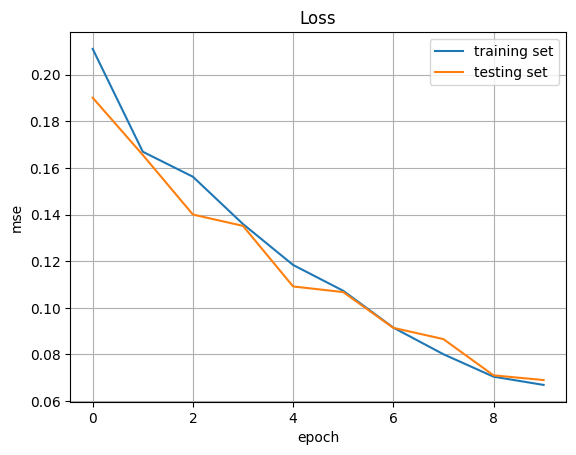

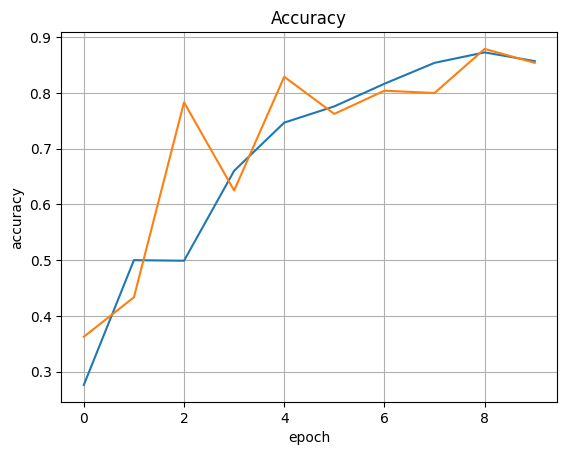

In [17]:
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='testing set')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title("Loss")
plt.legend()
plt.grid()
plt.show()

# change accuracy to acc
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='testing set')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Accuracy")
plt.grid()
plt.show()

model.save('/tmp/devnagri_model.h5')

